In [2]:
# Logistic Regression on breast-cancer-wisconsin Dataset
from random import seed
from random import randrange
from csv import reader
from math import exp

In [3]:
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

In [4]:
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

In [5]:
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

In [6]:
filename = 'breast-cancer-wisconsin.data.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
# normalize
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)

In [7]:
print(minmax)

[[1.0, 10.0], [1.0, 10.0], [1.0, 10.0], [1.0, 10.0], [1.0, 10.0], [1.0, 10.0], [1.0, 10.0], [1.0, 10.0], [1.0, 10.0], [2.0, 4.0]]


In [8]:
# Make a prediction with coefficients
def predict(row, coefficients):
    z = coefficients[0]
    for i in range(len(row)-1):
        z += coefficients[i + 1] * row[i]
    return 1.0 / (1.0 + exp(-z))

In [9]:
#learn value of the coefficients using gradient descent
def coefficients_gd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            z = predict(row, coef)
            error = row[-1] - z
            for i in range(len(row)):
                coef[i] = coef[i] + l_rate * error * row[i]
    return coef

In [10]:
#create training and test set
import random
random.shuffle(dataset)
length = len(dataset)
train_data = dataset[:int(length*2/3)]
test_data = dataset[int(length*1/3):]

In [11]:
l_rate = 0.008
n_epoch = 100
coef = coefficients_gd(train_data, l_rate, n_epoch)
print(coef)

[-4.643459492860538, 2.8109936203825416, 2.4768692479727106, 5.514066484658498, -5.034694053025206, 9.180305828448772, -0.9733882903047585, 2.258159761432655, -1.0980525400145291, 17.495305369639304]


In [20]:
cls = []
prob = []
for row in test_data:
    yhat = predict(row, coef)
    cls.append(row[-1])
    prob.append(yhat)
    #print("Expected=%.3f, Predicted=%.3f [%d]" % (float(row[-1]), yhat, round(yhat)))

In [14]:
def find_rates(cls, prob, threshold):
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(cls)):
        if(prob[i] >= threshold):
            if(cls[i] == 1):
                tp += 1
            else:
                fp += 1
        elif(prob[i] < threshold):
            if(cls[i] == 0):
                tn += 1
            else:
                fn += 1
    #print((tp,fp,tn,fn)) 
    #print("####")
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)
    return [fpr,tpr]
        
            
        
    

In [21]:
thresholds = [0,.10,.20,.30,.40,.50,.60,.70,.80,.90,1]
final_points = []
for threshold in thresholds:
    rates = find_rates(cls, prob, threshold)
    #print(rates)
    final_points.append(rates)
print(final_points)

[[1.0, 1.0], [0.32450331125827814, 0.9512195121951219], [0.1456953642384106, 0.9390243902439024], [0.09602649006622517, 0.9146341463414634], [0.076158940397351, 0.8841463414634146], [0.056291390728476824, 0.8719512195121951], [0.046357615894039736, 0.8658536585365854], [0.033112582781456956, 0.8414634146341463], [0.033112582781456956, 0.8170731707317073], [0.029801324503311258, 0.774390243902439], [0.0, 0.0]]


In [22]:
import numpy as np
import matplotlib.pyplot as plt

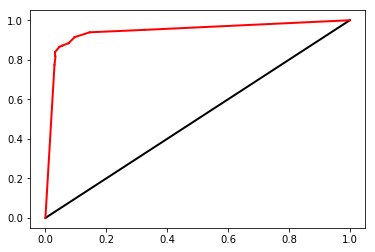

In [23]:
plt.plot([0, 1], [0, 1], 'k-', lw=2)
for i in range(len(final_points)-1):
    point1 = final_points[i];
    point2 = final_points[i+1]
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'r', lw=2)
plt.show() 